In [1]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving salary_batting_people_2015.csv to salary_batting_people_2015.csv


In [69]:
import pandas as pd
df = pd.read_csv('salary_batting_people_2015.csv')
df.head()

,uniqueid,yearid,teamid,lgid,playerid,salary,games,bats,runs,hits,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015ARIahmedni01,2015,ARI,NL,ahmedni01,508500,134.0,421.0,49.0,95.0,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
1,2015ARIanderch01,2015,ARI,NL,anderch01,512500,28.0,48.0,0.0,5.0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01
2,2015ARIchafian01,2015,ARI,NL,chafian01,507500,66.0,3.0,0.0,0.0,...,Chafin,Andrew Gregory,235,74,R,L,2014-08-13,2021-09-29,chafa001,chafian01
3,2015ARIcollmjo01,2015,ARI,NL,collmjo01,1400000,44.0,27.0,2.0,5.0,...,Collmenter,Joshua Michael,240,75,R,R,2011-04-17,2017-05-24,collj001,collmjo01
4,2015ARIcorbipa01,2015,ARI,NL,corbipa01,524000,16.0,25.0,1.0,3.0,...,Corbin,Patrick Alan,220,76,L,L,2012-04-30,2021-09-28,corbp001,corbipa01


In [70]:
df.columns

Index(['uniqueid', 'yearid', 'teamid', 'lgid', 'playerid', 'salary', 'games',
       'bats', 'runs', 'hits', 'doubles', 'triples', 'homeruns', 'rbi',
       'stolen_bases', 'caught_stealing', 'walks', 'strike_outs',
       'international_walks', 'hit_by_pitch', 'sacrifice_bunt',
       'sacrifice_flies', 'hit_into_double_plays', 'birthyear', 'birthmonth',
       'birthday', 'birthcountry', 'birthstate', 'birthcity', 'deathyear',
       'deathmonth', 'deathday', 'deathcountry', 'deathstate', 'deathcity',
       'namefirst', 'namelast', 'namegiven', 'weight', 'height', 'bats_hand',
       'throws_hand', 'debut', 'finalgame', 'retroid', 'bbrefid'],
      dtype='object')

In [71]:
df.isnull().values.any()

True

In [72]:
df.isnull().sum()

uniqueid                   0
yearid                     0
teamid                     0
lgid                       0
playerid                   0
salary                     0
games                      3
bats                       3
runs                       3
hits                       3
doubles                    3
triples                    3
homeruns                   3
rbi                        3
stolen_bases               3
caught_stealing            3
walks                      3
strike_outs                3
international_walks        3
hit_by_pitch               3
sacrifice_bunt             3
sacrifice_flies            3
hit_into_double_plays      3
birthyear                  0
birthmonth                 0
birthday                   0
birthcountry               0
birthstate                22
birthcity                  0
deathyear                814
deathmonth               814
deathday                 814
deathcountry             814
deathstate               814
deathcity     

In [73]:
df = df[['uniqueid','salary','games','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'strike_outs', 'weight','height']]
df.columns

Index(['uniqueid', 'salary', 'games', 'bats', 'runs', 'rbi', 'hits', 'doubles',
       'triples', 'homeruns', 'walks', 'strike_outs', 'weight', 'height'],
      dtype='object')

In [74]:
df.isnull().sum()

uniqueid       0
salary         0
games          3
bats           3
runs           3
rbi            3
hits           3
doubles        3
triples        3
homeruns       3
walks          3
strike_outs    3
weight         0
height         0
dtype: int64

In [75]:
cleaned_df = df.dropna()

In [10]:
y = cleaned_df['salary']
X = cleaned_df[['games','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'strike_outs', 'weight','height']]

In [11]:
print(y.shape)
print(X.shape)

(814,)
(814, 12)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Check R-Squared
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1647563425979931
Testing Score: 0.18722990697394126


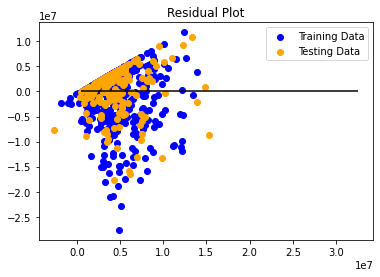

In [15]:
#Residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [77]:
from google.colab import files

cleaned_df.to_csv('2015_Cleanedv2.csv', encoding = 'utf-8-sig') 
files.download('2015_Cleanedv2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Multivariate ML with only 2 parameters

In [17]:
cleaned_df.columns

Index(['salary', 'games', 'bats', 'runs', 'rbi', 'hits', 'doubles', 'triples',
       'homeruns', 'walks', 'strike_outs', 'weight', 'height'],
      dtype='object')

In [18]:
X2 = cleaned_df[['weight','height']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42)

In [20]:
model2 = LinearRegression()

# Fitting our model with all our features in X
model2.fit(X_train, y_train)

LinearRegression()

In [21]:
training_score = model2.score(X_train, y_train)
testing_score = model2.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.02106612012880671
Testing Score: 0.010716172149103365


In [48]:
import pandas as pd
df = pd.read_csv('salary_batting_people_2015.csv')
df.head()

,uniqueid,yearid,teamid,lgid,playerid,salary,games,bats,runs,hits,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015ARIahmedni01,2015,ARI,NL,ahmedni01,508500,134.0,421.0,49.0,95.0,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
1,2015ARIanderch01,2015,ARI,NL,anderch01,512500,28.0,48.0,0.0,5.0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01
2,2015ARIchafian01,2015,ARI,NL,chafian01,507500,66.0,3.0,0.0,0.0,...,Chafin,Andrew Gregory,235,74,R,L,2014-08-13,2021-09-29,chafa001,chafian01
3,2015ARIcollmjo01,2015,ARI,NL,collmjo01,1400000,44.0,27.0,2.0,5.0,...,Collmenter,Joshua Michael,240,75,R,R,2011-04-17,2017-05-24,collj001,collmjo01
4,2015ARIcorbipa01,2015,ARI,NL,corbipa01,524000,16.0,25.0,1.0,3.0,...,Corbin,Patrick Alan,220,76,L,L,2012-04-30,2021-09-28,corbp001,corbipa01


In [25]:
plot_df = df[['uniqueid','salary','games','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'strike_outs', 'weight','height']]
plot_df.head()

,uniqueid,salary,games,bats,runs,rbi,hits,doubles,triples,homeruns,walks,strike_outs,weight,height
0,2015ARIahmedni01,508500,134.0,421.0,49.0,34.0,95.0,17.0,6.0,9.0,29.0,81.0,201,74
1,2015ARIanderch01,512500,28.0,48.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,23.0,210,73
2,2015ARIchafian01,507500,66.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,235,74
3,2015ARIcollmjo01,1400000,44.0,27.0,2.0,1.0,5.0,0.0,0.0,0.0,3.0,9.0,240,75
4,2015ARIcorbipa01,524000,16.0,25.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,11.0,220,76


In [26]:
plot_x = plot_df['uniqueid']
plot_y = plot_df['salary']

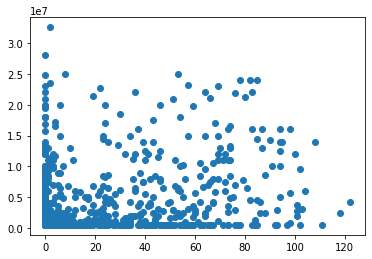

In [27]:
plt.scatter(plot_df['runs'], plot_df['salary'])
plt.show()

In [28]:
X2 = cleaned_df[['weight','height']]
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42)
model2 = LinearRegression()

# Fitting our model with all our features in X
model2.fit(X_train, y_train)
training_score = model2.score(X_train, y_train)
testing_score = model2.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.02106612012880671
Testing Score: 0.010716172149103365


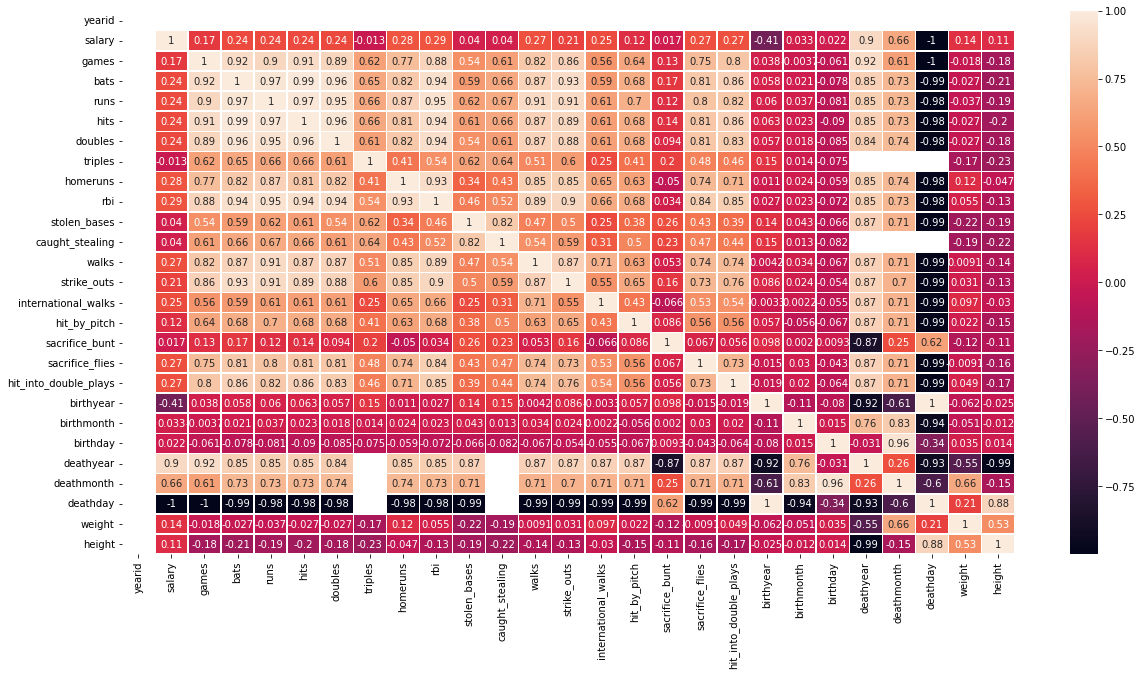

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

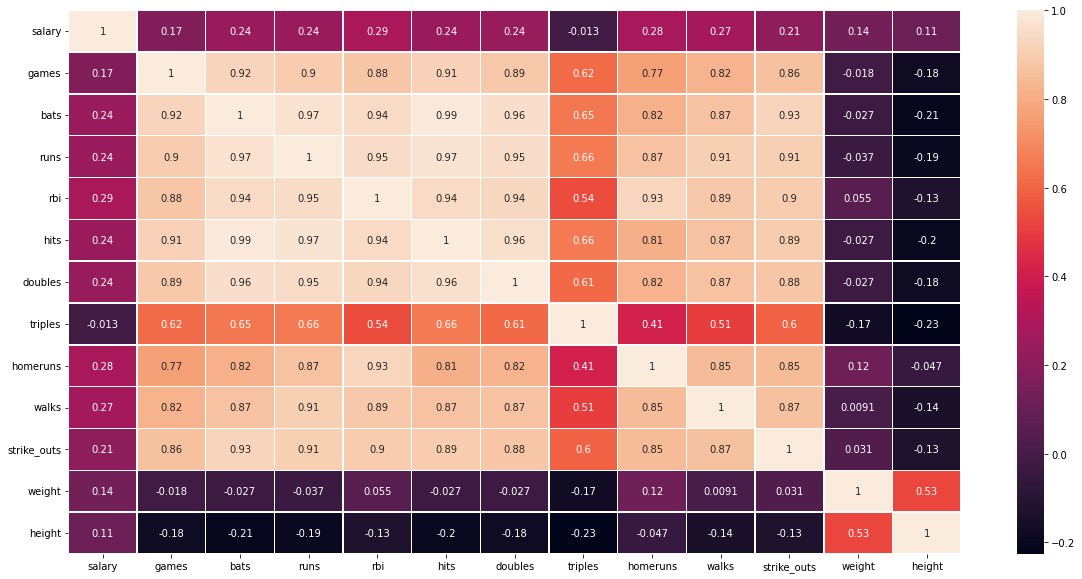

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr(),annot=True,linewidth=0.5)

**Model 1 - Positivly correlated parameters from batting stats**

In [31]:
ml1_y = cleaned_df['salary']
ml1_X = cleaned_df[['games','bats','runs','rbi', 'hits', 'doubles', 'homeruns', 'walks', 'strike_outs', 'weight','height']]

In [32]:
print(ml1_y.shape)
print(ml1_X.shape)

(814,)
(814, 11)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(ml1_X, ml1_y, random_state=17)

In [34]:
#Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Check R-Squared
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.15228033428018117
Testing Score: 0.14368204581262578


**Model 2 - Positively correlated parameters from all data**

In [57]:
import pandas as pd
df = pd.read_csv('salary_batting_people_2015.csv')
df.head()

,uniqueid,yearid,teamid,lgid,playerid,salary,games,bats,runs,hits,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015ARIahmedni01,2015,ARI,NL,ahmedni01,508500,134.0,421.0,49.0,95.0,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
1,2015ARIanderch01,2015,ARI,NL,anderch01,512500,28.0,48.0,0.0,5.0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01
2,2015ARIchafian01,2015,ARI,NL,chafian01,507500,66.0,3.0,0.0,0.0,...,Chafin,Andrew Gregory,235,74,R,L,2014-08-13,2021-09-29,chafa001,chafian01
3,2015ARIcollmjo01,2015,ARI,NL,collmjo01,1400000,44.0,27.0,2.0,5.0,...,Collmenter,Joshua Michael,240,75,R,R,2011-04-17,2017-05-24,collj001,collmjo01
4,2015ARIcorbipa01,2015,ARI,NL,corbipa01,524000,16.0,25.0,1.0,3.0,...,Corbin,Patrick Alan,220,76,L,L,2012-04-30,2021-09-28,corbp001,corbipa01


In [59]:
ml2_df = df.dropna()

In [65]:
ml2_y = ml2_df['salary']
ml2_X = ml2_df[['games','bats','runs','rbi', 'hits', 'doubles', 'homeruns', 'stolen_bases', 'caught_stealing','walks', 'strike_outs', 'international_walks','hit_by_pitch','sacrifice_bunt', 'sacrifice_flies','hit_into_double_plays','birthmonth','birthday','deathyear','deathmonth','weight','height']]

In [66]:
print(ml2_y.shape)
print(ml2_X.shape)

(3,)
(3, 22)


In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(ml2_X, ml2_y, random_state=17)

In [68]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [79]:
# Check R-Squared
training_score = model2.score(X_train2, y_train2)
testing_score = model2.score(X_test2, y_test2)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Model 3**

In [80]:
y3 = cleaned_df['salary']
X3 = cleaned_df[['games','bats','runs','rbi', 'hits', 'doubles', 'homeruns', 'walks', 'strike_outs', 'weight','height']]

In [81]:
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X3, y3,random_state=1)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

In [86]:
output_df=pd.DataFrame(val_X)
output_df['prediction']=predictions
output_df['ID']=[cleaned_df['uniqueid'][index] for index in output_df.reset_index()['index']]
output_df['salary']=[cleaned_df['salary'][index] for index in output_df.reset_index()['index']]
output_df=output_df[['ID','games','bats','runs','rbi', 'hits', 'doubles', 'homeruns', 'walks', 'strike_outs', 'weight','height','salary','prediction']]
output_df

,ID,games,bats,runs,rbi,hits,doubles,homeruns,walks,strike_outs,weight,height,salary,prediction
354,2015LAAweaveje02,26.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,210,79,18000000,7000000.0
668,2015SFNmcgehca01,49.0,127.0,7.0,11.0,27.0,5.0,2.0,11.0,28.0,220,73,4800000,509525.0
538,2015OAKrodrife02,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235,75,635000,1087500.0
808,2015WASstoredr01,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200,73,5700000,3200000.0
8,2015ARIgosewtu01,38.0,128.0,9.0,13.0,27.0,6.0,1.0,8.0,23.0,185,71,514500,900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2015CHAjennida01,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215,75,523000,3500000.0
115,2015CHAbeckhgo01,100.0,211.0,24.0,20.0,44.0,8.0,6.0,19.0,43.0,188,72,2000000,1500000.0
713,2015TBAfrankni01,44.0,101.0,11.0,7.0,16.0,4.0,3.0,7.0,37.0,190,73,1021800,511250.0
622,2015SDNuptonbj01,87.0,205.0,23.0,17.0,53.0,12.0,5.0,21.0,62.0,185,75,14450000,2500000.0


In [87]:
output_df['excess']=output_df['prediction']-output_df['salary']
output_df.sort_values(by='excess')

,ID,games,bats,runs,rbi,hits,doubles,homeruns,walks,strike_outs,weight,height,salary,prediction,excess
373,2015LANkershcl01,34.0,71.0,2.0,2.0,9.0,2.0,0.0,2.0,23.0,225,76,32571000,9000000.0,-23571000.0
485,2015NYAsabatcc01,29.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,300,78,23000000,2100000.0,-20900000.0
488,2015NYAteixema01,111.0,392.0,57.0,79.0,100.0,22.0,31.0,59.0,85.0,225,75,23125000,6500000.0,-16625000.0
481,2015NYArodrial01,151.0,523.0,83.0,86.0,131.0,22.0,33.0,84.0,145.0,230,75,22000000,6000000.0,-16000000.0
362,2015LANethiean01,142.0,395.0,54.0,53.0,116.0,20.0,14.0,43.0,75.0,210,74,18000000,2725000.0,-15275000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2015NYApireljo01,37.0,74.0,7.0,5.0,17.0,3.0,1.0,2.0,16.0,220,72,510000,16500000.0,15990000.0
530,2015OAKhahnje01,16.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,205,77,507500,16800000.0,16292500.0
246,2015COLrosarwi01,87.0,231.0,22.0,29.0,62.0,14.0,6.0,8.0,56.0,225,71,2800000,21357000.0,18557000.0
640,2015SEApaxtoja01,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,227,76,519000,21000000.0,20481000.0
